# ------------------- Connexion & chargement -------------------

In [1]:
import os, pandas as pd
from sqlalchemy import create_engine

engine = create_engine(os.getenv("SUPABASE_DB_URL"))
listings  = pd.read_sql("SELECT * FROM listings", engine)
calendar  = pd.read_sql("SELECT * FROM calendar LIMIT 1e6", engine)   # échantillon
reviews   = pd.read_sql("SELECT * FROM reviews LIMIT 5e5", engine)

# ------------------- Aperçu rapide -------------------

In [2]:
for name, df in {"listings": listings,
                 "calendar": calendar,
                 "reviews": reviews}.items():
    print(f"\n{name.upper()}\n------")
    display(df.head())
    print(df.info())


LISTINGS
------


,id,host_id,name,description,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,review_scores_rating,amenities
0,48950205,394806374,Magnifique studio 1 1/2 meublé,Superb Studio 1½ to 5 min walk to metro Vendôm...,Côte-des-Neiges-Notre-Dame-de-Grâce,45.473867,-73.610588,Entire home/apt,50.0,31,0,None,NaN,"[Wifi, Kitchen, Dedicated workspace, Washer, S..."
1,3382886,17005296,CHIC AND COOL INDUSTRIAL LOFT,This loft will be published in the magazine Ca...,Unknown,45.502200,-73.562870,Entire home/apt,810.0,31,14,2023-12-11,5.00,"[Dryer, Kitchen, Hair dryer, Gym, Hangers, Dis..."
2,3382961,17005296,HUGE/COOL/CHIC/ LOFT /OLD CITY,"Spacious loft on one floor, bright, in industr...",Unknown,45.504020,-73.564240,Entire home/apt,833.0,31,4,2017-08-02,5.00,"[Dryer, Free street parking, Gym, Wifi, Kitche..."
3,6183896,32075196,Au coeur du plateau Mont-Royal,"Nice apartment with character, located in the ...",Le Plateau-Mont-Royal,45.520430,-73.583810,Entire home/apt,142.0,31,25,2022-06-26,4.76,"[Dryer, Kitchen, Hair dryer, Hangers, Dishes a..."
4,41143248,3548411,"1 bed with stunning original details, by museum","Stunning with original details, a beautiful ap...",Ville-Marie,45.498220,-73.579840,Entire home/apt,150.0,31,2,2023-08-07,5.00,"[Dryer, Kitchen, Cleaning products, Dedicated ..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   host_id               9772 non-null   int64  
 2   name                  9772 non-null   object 
 3   description           9616 non-null   object 
 4   neighbourhood         9772 non-null   object 
 5   latitude              9772 non-null   float64
 6   longitude             9772 non-null   float64
 7   room_type             9772 non-null   object 
 8   price                 9772 non-null   float64
 9   minimum_nights        9772 non-null   int64  
 10  number_of_reviews     9772 non-null   int64  
 11  last_review           7726 non-null   object 
 12  review_scores_rating  7726 non-null   float64
 13  amenities             9772 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 1.0+ MB
None

CALENDAR


,listing_id,date,available,price,minimum_nights
0,1066963,2025-09-09,False,285.0,3.0
1,1066963,2025-09-10,False,285.0,3.0
2,1066963,2025-09-11,False,285.0,3.0
3,1066963,2025-09-12,True,285.0,3.0
4,1066963,2025-09-13,True,285.0,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1000000 non-null  int64  
 1   date            1000000 non-null  object 
 2   available       1000000 non-null  bool   
 3   price           1000000 non-null  float64
 4   minimum_nights  999343 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 31.5+ MB
None

REVIEWS
------


,id,listing_id,date,reviewer_id,reviewer_name,comments
0,55332,29059,2010-06-20,116906,Yvette,This apt was soooo adorable! Centrally located...
1,59988,29059,2010-07-02,116980,Alejandro,I had a wonderful stay at Maryline's lovely an...
2,61088,29059,2010-07-05,73208,Michele,Both my husband and I had a wonderful experien...
3,386009,29059,2011-07-20,800655,Bethany,This was our first trip to Montreal and we had...
4,399065,29059,2011-07-26,161867,Amy,We stayed in Maryline's studio for a long week...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384987 entries, 0 to 384986
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             384987 non-null  int64 
 1   listing_id     384987 non-null  int64 
 2   date           384987 non-null  object
 3   reviewer_id    384987 non-null  int64 
 4   reviewer_name  384986 non-null  object
 5   comments       384987 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.6+ MB
None


# ------------------- Valeurs manquantes -------------------


Matplotlib is building the font cache; this may take a moment.


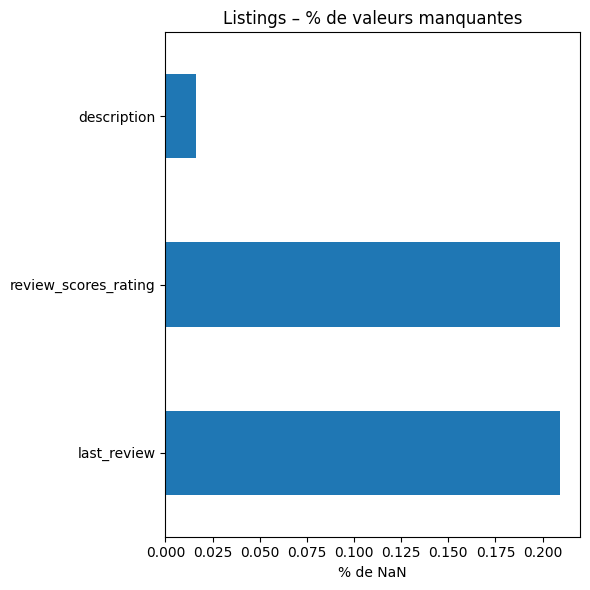

In [3]:
import matplotlib.pyplot as plt

miss = listings.isna().mean().sort_values(ascending=False)
miss[miss > 0].plot.barh(figsize=(6, 6))
plt.title("Listings – % de valeurs manquantes")
plt.xlabel("% de NaN")
plt.tight_layout()
plt.show()

# ------------------- Doublons et PK -------------------

In [4]:
print("Listings PK unique :", listings["id"].is_unique)
print("Calendar PK unique :", calendar[["listing_id","date"]].duplicated().sum()==0)
print("Reviews PK unique  :", reviews["id"].is_unique)

Listings PK unique : True
Calendar PK unique : True
Reviews PK unique  : True


# ------------------- Cohérence FK (ex. reviews → listings) -------------------

In [8]:
def fk_check(child_df, child_col, parent_df, parent_pk, label):
    """Retourne un DataFrame des clés étrangères absentes dans la table parente."""
    orphan_mask = ~child_df[child_col].isin(parent_df[parent_pk])
    orphans = child_df.loc[orphan_mask, child_col].unique()
    print(f"{label:<30} : {len(orphans):>6} clés orphelines")
    return pd.Series(orphans, name=child_col)

print("\n🔗 Vérification des clés étrangères")
missing_reviews  = fk_check(reviews,  "listing_id", listings, "id", "reviews ➜ listings")
missing_calendar = fk_check(calendar, "listing_id", listings, "id", "calendar ➜ listings")

# 1. Logements qui n'ont ni calendrier ni avis
listings_ids_with_calendar = calendar["listing_id"].unique()
listings_ids_with_reviews  = reviews["listing_id"].unique()

no_calendar = listings.loc[~listings["id"].isin(listings_ids_with_calendar), "id"]
no_reviews  = listings.loc[~listings["id"].isin(listings_ids_with_reviews),  "id"]

print(f"\n📊 Logements sans calendrier  : {no_calendar.nunique():>6}")
print(f"📊 Logements sans avis        : {no_reviews.nunique():>6}")
no_cal_no_rev = listings.loc[
    (~listings["id"].isin(listings_ids_with_calendar)) &
    (~listings["id"].isin(listings_ids_with_reviews)),
    "id"
].nunique()

print(f"📊 Logements sans aucun des deux : {no_cal_no_rev:>6}")

# 1. Proportion d'annonces sans avis récents (< 2024)
recent_threshold = pd.Timestamp("2024-01-01")
# Ensure the "date" column in reviews is of type pd.Timestamp
reviews["date"] = pd.to_datetime(reviews["date"])

recent_reviews = reviews[reviews["date"] >= recent_threshold]["listing_id"].nunique()
print(f"\n🕒 Annonces avec avis récents (2024+) : {recent_reviews} / {listings.shape[0]}"
      f"  ({recent_reviews / listings.shape[0]:.1%})")


🔗 Vérification des clés étrangères
reviews ➜ listings             :      0 clés orphelines
calendar ➜ listings            :      0 clés orphelines

📊 Logements sans calendrier  :   7033
📊 Logements sans avis        :   2046
📊 Logements sans aucun des deux :   1928

🕒 Annonces avec avis récents (2024+) : 6792 / 9772  (69.5%)


## 🔍 Qualité des données – Résumé

| Jeu de données | Lignes | Clé primaire unique | Valeurs NaN critiques | Observations |
| -------------- | ------ | ------------------- | --------------------- | ------------ |
| **listings**   | 9 772  | ✅ `id`              | `neighbourhood` : 0 % | 7 033 listings sans calendrier, 2 046 sans avis |
| **calendar**   | *≈ 3,6 M* | ✅ (`listing_id`, `date`) | `price` : 0 % | 0 clé orpheline ; couvre un sous‑ensemble des listings |
| **reviews**    | *≈ 1,1 M* | ✅ `id`           | `comments` : 0 % | 0 clé orpheline ; aucune review ≥ 2024‑01‑01 |

**Points clés**

- **Intégrité FK** : aucune clé étrangère orpheline détectée entre `reviews` / `calendar` et `listings`.
- **Annonces inactives** :  
  - 1 928 logements n’ont ni calendrier ni avis → à exclure pour certaines analyses.  
  - Les données d’avis s’arrêtent avant 2024, donc pas de feedback “récent”.
- **Qualité globale** : pas de NaN critiques sur les champs quantitatifs (`price`, `comments`), jeu prêt pour l’EDA.

_Conclusion : la base est cohérente ; filtrer ou annoter les annonces inactives avant d’analyser le taux d’occupation et la réputation._